## Prepare python environment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
random_state=5 # use this to control randomness across runs e.g., dataset partitioning

## Preparing the Credit Card Fraud Detection dataset (2 points)

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
See [here](https://www.kaggle.com/mlg-ulb/creditcardfraud) for details of the dataset. We will post process the data to balance both the classes indicating whether the transaction is fraud or not.

### Loading the dataset

In [ ]:
# Download and load the dataset
import os
if not os.path.exists('creditcard.csv'): 
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/creditcard.zip
    !unzip creditcard.zip

df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [ ]:
# Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### There are a total of 284807 entries in this dataset with no missing values. First 30 columns are features and the last column indicates whether the transaction is fraud or not

In [ ]:
##### Look at some statistics of the data using the `describe` function
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Visualize the distribution of fraudulent vs genuine transactions

Text(0, 0.5, '')

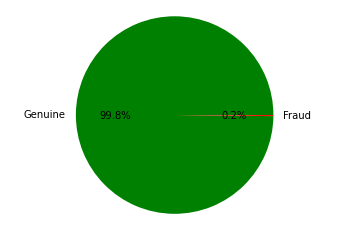

In [ ]:
# Make a pie chart showing transaction type
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','red'])
plt.axis('equal')
plt.ylabel('')

Text(0, 0.5, '# transactions')

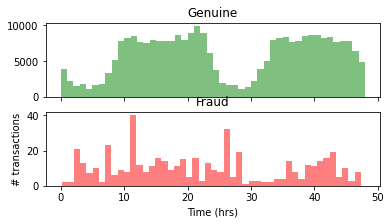

In [ ]:
## Check fradulent activity over time (note: total time os 48 hours)
df["Time_Hr"] = df["Time"]/3600 # convert to hours
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [ ]:
# Remove 'Time' feature as it is already captured when converting to hours
df = df.drop(['Time'],axis=1)

#### Create a balanced dataset with 50% from each class

In [ ]:
fraud_indices = np.array(df[df.Class == 1].index) #indices corresponding to fraud transaction
genuine_ind = df[df.Class == 0].index #indices corresponding to genuine transaction
total_fraud_transactions = len(df[df.Class == 1]) # total transactions that were fraud
np.random.seed(0) # fix the random seed generator for consistent results
indices_genuine_transaction = np.random.choice(genuine_ind, total_fraud_transactions, replace = False)
indices_genuine_transaction = np.array(indices_genuine_transaction)
selected_balanced_indices = np.concatenate([fraud_indices,indices_genuine_transaction]) # indices for balanced data
balanced_data = df.iloc[selected_balanced_indices,:]

In [ ]:
print("% genuine transactions: ",len(balanced_data[balanced_data.Class == 0])/len(balanced_data))
print("% fraud transactions: ",len(balanced_data[balanced_data.Class == 1])/len(balanced_data))

# Make a pie chart showing transaction type
fig, ax = plt.subplots(1, 1)
ax.pie(balanced_data.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','red'])
plt.axis('equal')
plt.ylabel('')

### Extract target and descriptive features (0.5 points)

In [ ]:
# Store all the features from the data in X
X= balanced_data.drop('Class',axis=1)
# Store all the labels in y
y= balanced_data['Class']

In [ ]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()

### Create training and validation datasets (0.5 points)


We will split the dataset into training and validation set. Generally in machine learning, we split the data into training,
validation and test set (this will be covered in later chapters). The model with best performance on the validation set is used to evaluate perfromance on 
the test set which is the unseen data. In this assignment, we will using `train set` for training and evaluate the performance on the `test set` for various 
model configurations to determine the best hyperparameters (parameter setting yielding the best performance).

Split the data into training and validation set using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for validation. This has been done for you.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=random_state) # 80% training and 20% validation

### Preprocess the dataset (1 points)

#### Preprocess by normalizing each feature to have zero mean and unit standard deviation. This can be done using `StandardScaler()` function. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more details.


In [ ]:
# Define the scaler for scaling the data
scaler = StandardScaler()

# Normalize the training data
X_train = scaler.fit_transform(X_train)

# Use the scaler defined above to standardize the validation data by applying the same transformation to the validation data.
X_test = scaler.transform(X_test)


## Training error-based models (18 points)


#### We will use the `sklearn` library to train a Multinomial Logistic Regression classifier and Support Vector Machines. 


### Exercise 1:  Learning a Multinomial Logistic Regression classifier (4 points)

#### Use `sklearn`'s `SGDClassifier` to train a multinomial logistic regression classifier (i.e., using a one-versus-rest scheme) with Stochastic Gradient Descent. Review ch.7 and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) for more details. 

#### Set the `random_state` as defined above,  increase the `n_iter_no_change` to 1000 and `max_iter` to 10000 to facilitate better convergence.  

#### Report the model's accuracy over the training and test sets.
 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score 

In [ ]:
# Create Logistic Regression based classifier
clf = SGDClassifier(loss='log', random_state=random_state, n_iter_no_change=1000, max_iter=10000)

# Train Classifer on training set
clf = clf.fit(X_train,y_train)

#Predict the response for train dataset
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

print("train accuracy: %.2f" % accuracy_score(y_train, y_pred_train))
print("test accuracy: %.2f" % accuracy_score(y_test, y_pred_test))

train accuracy: 0.95
test accuracy: 0.93


#### Explain any performance difference observed between the training and test datasets.

The classifier is slightly overfitting to the training dataset, resulting in lower accuracy on the test dataset.

### Exercise 2: Learning a Support Vector Machine (SVM) (14 points)

#### Use `sklearn`'s `SVC` class to train an SVM (i.e., using a [one-versus-one scheme](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-one)). Review ch.7 and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for more details. 
 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Exercise 2a: Warm up (2 points)

#### Train an SVM with a linear kernel. Set the  random_state to the value defined above. Keep all other parameters at their defaults.

#### Report the model's accuracy over the training and test sets.

In [ ]:
clf = SVC(kernel='linear', random_state=random_state)
clf.fit(X_train,y_train)

print("training acc: %.2f" % accuracy_score(y_train, clf.predict(X_train)))
print("test acc: %.2f" % accuracy_score(y_test, clf.predict(X_test)))


training acc: 0.95
test acc: 0.94


#### Exercise 2b: Evaluate a polynomial kernel function (4 points)

#### Try fitting an SVM with a polynomial kernel function and vary the degree among {1, 2, 3, 4}. Note that degree=1 yields a linear kernel. 

#### For each fitted classifier, report its accuracy over the training and test sets. 

#### As before, set the random_state to the value defined above. Set the regularization strength `C=100`.  When the data is not linearly separable, this encourages the model to fit the training data. Keep all other parameters at their default values.

In [ ]:

for degree in [1,2,3,4]:
    clf = SVC(kernel='poly', random_state=random_state, degree=degree, C=100)
    clf.fit(X_train,y_train)
    
    print("Poly kernel, degree: %d" %degree)
    print("training acc: %.2f" % accuracy_score(y_train, clf.predict(X_train)))
    print("test acc: %.2f" % accuracy_score(y_test, clf.predict(X_test)))


Poly kernel, degree: 1
training acc: 0.95
test acc: 0.93
Poly kernel, degree: 2
training acc: 0.97
test acc: 0.86
Poly kernel, degree: 3
training acc: 0.99
test acc: 0.92
Poly kernel, degree: 4
training acc: 0.99
test acc: 0.89


#### Explain the effect of increasing the degree of the polynomial.

Increasing the degree of the polynomial kernel function allows the model to better fit the training dataset. Consequently the model overfits to the training data and reduces generalization. 

#### Exercise 2c: Evaluate the radial basis kernel function (6 points)

#### Try fitting an SVM with a radial basis kernel function and vary the length-scale parameter given by $\gamma$ among {0.1, 0.01,1,10, 100}. 

#### For each fitted classifier, report its accuracy over the training and test sets. 

#### As before, set the random_state to the value defined above. Set the regularization strength `C=100`.  When the data is not linearly separable, this encourages the model to fit the training data (read more [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)). Keep all other parameters at their default values.

In [ ]:

for gamma in [0.01,0.1,1,10,100]:
    clf = SVC(kernel='rbf', random_state=random_state, gamma=gamma, C=100)
    clf.fit(X_train,y_train)
    
    print("RBF kernel, gamma: ", gamma)
    print("training acc: %.2f" % accuracy_score(y_train, clf.predict(X_train)))
    print("test acc: %.2f" % accuracy_score(y_test, clf.predict(X_test)))


RBF kernel, gamma:  0.01
training acc: 0.97
test acc: 0.93
RBF kernel, gamma:  0.1
training acc: 1.00
test acc: 0.92
RBF kernel, gamma:  1
training acc: 1.00
test acc: 0.80
RBF kernel, gamma:  10
training acc: 1.00
test acc: 0.61
RBF kernel, gamma:  100
training acc: 1.00
test acc: 0.56


#### Comment on the effect of increasing/reducing the length-scale parameter $\gamma$. Also, compare the performance of the classifiers trained with RBF kernel function against those trained with the polynomial and linear kernel functions (i.e., Ex. 2b). 

Increasing $\gamma$ degrades generalization. $\gamma$ determines when points are deemed close and far. Larger $\gamma$ reduces the radius of influence of select training examples (support vectors), so that data points are only affected by a few nearby support vectors during inference. Smaller $\gamma$ increases the radius of influence of select training examples (support vectors), so that data points are also affected by more distant support vectors during inference. 

Increasing $\gamma$ to values greater than 0.1 reduces generalization performance because the classifier effectively relies on a few training examples (support vectors) that are close to the data point in order to make its prediction. Learn more [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

Classifiers trained with the RBF kernel function overfit the training data more than those trained with the polynomial and linear kernel functions. This is because the RBF kernel function maps into an infinite-dimensional feature space. The increased overfitting, esp. at large $\gamma$, degrades generalization performance, resulting in less performant classifiers compared to classifiers trained with linear and polynomial kernel functions.

#### Exercise 2d: Briefly state the main difference between the logistic regression classifier and the SVM. (2 points)

SVMs are explicitly trained to learn decision boundaries with large margins separating the classes.  